<a href="https://colab.research.google.com/github/tasanyphy01773/Computational_Physics/blob/main/Main_advection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class FDGrid:
    """a finite-difference grid"""

    def __init__(self, nx, ng=1, xmin=0.0, xmax=1.0):
        """create a grid with nx points, ng ghost points (on each end)
        that runs from [xmin, xmax]"""

        self.xmin = xmin
        self.xmax = xmax
        self.ng = ng
        self.nx = nx

        # python is zero-based.  Make easy integers to know where the
        # real data lives
        self.ilo = ng
        self.ihi = ng+nx-1

        # physical coords
        self.dx = (xmax - xmin)/(nx-1)
        self.x = xmin + (np.arange(nx+2*ng)-ng)*self.dx

        # storage for the solution
        self.a = np.zeros((nx+2*ng), dtype=np.float64)
        self.ainit = np.zeros((nx+2*ng), dtype=np.float64)
        
    def scratch_array(self):
        """ return a scratch array dimensioned for our grid """
        return np.zeros((self.nx+2*self.ng), dtype=np.float64)

    def fill_BCs(self):
        """ fill the a single ghostcell with periodic boundary conditions """
        self.a[self.ilo-1] = self.a[self.ihi-1]
        self.a[self.ihi+1] = self.a[self.ilo+1]
        


In [3]:
def upwind_advection(nx, u, C, num_periods=1.0, init_cond=None):
    """solve the linear advection equation using FTCS.  You are required
    to pass in a function f(g), where g is a FDGrid object that sets up
    the initial conditions"""
    
    g = FDGrid(nx)
    
    # time info
    dt = C*g.dx/u
    t = 0.0
    tmax = num_periods*(g.xmax - g.xmin)/u

    # initialize the data
    init_cond(g)

    g.ainit[:] = g.a[:]
    
    # evolution loop
    anew = g.scratch_array()

    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t
            C = u*dt/g.dx

        # fill the boundary conditions
        g.fill_BCs()

        # loop over zones: note since we are periodic and both endpoints
        # are on the computational domain boundary, we don't have to
        # update both g.ilo and g.ihi -- we could set them equal instead.
        # But this is more general
        for i in range(g.ilo, g.ihi+1):
            anew[i] = g.a[i] - C*(g.a[i] - g.a[i-1])

        # store the updated solution
        g.a[:] = anew[:]
        
        t += dt
        
    return g

In [76]:
def downwind_advection(nx, u, C, num_periods=1.0, init_cond=None):
    """solve the linear advection equation using FTCS.  You are required
    to pass in a function f(g), where g is a FDGrid object that sets up
    the initial conditions"""
    
    g = FDGrid(nx)
    
    # time info
    dt = C*g.dx/u
    t = 0.0
    tmax = num_periods*(g.xmax - g.xmin)/u

    # initialize the data
    init_cond(g)

    g.ainit[:] = g.a[:]
    
    # evolution loop
    anew = g.scratch_array()

    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t
            C = u*dt/g.dx

        # fill the boundary conditions
        g.fill_BCs()

        # loop over zones: note since we are periodic and both endpoints
        # are on the computational domain boundary, we don't have to
        # update both g.ilo and g.ihi -- we could set them equal instead.
        # But this is more general
        for i in range(g.ilo, g.ihi+1):
            anew[i] = (1+C)*g.a[i] - C*(g.a[i+1])

        # store the updated solution
        g.a[:] = anew[:]
        
        t += dt
        
    return g

In [58]:
def ftcs_advection(nx, u, C, num_periods=1.0, init_cond=None):
    """solve the linear advection equation using FTCS.  You are required
    to pass in a function f(g), where g is a FDGrid object that sets up
    the initial conditions"""
    
    g = FDGrid(nx)
    
    # time info
    dt = C*g.dx/u
    t = 0.0
    tmax = num_periods*(g.xmax - g.xmin)/np.abs(u)

    # initialize the data
    init_cond(g)

    g.ainit[:] = g.a[:]
    
    # evolution loop
    anew = g.scratch_array()

    while t < tmax:

        if t + dt > tmax:
            dt = tmax - t
            C = u*dt/g.dx

        # fill the boundary conditions
        g.fill_BCs()

        # loop over zones: note since we are periodic and both endpoints
        # are on the computational domain boundary, we don't have to
        # update both g.ilo and g.ihi -- we could set them equal instead.
        # But this is more general
        for i in range(g.ilo, g.ihi+1):
            anew[i] = g.a[i] - 0.5*C*(g.a[i+1] - g.a[i-1])

        # store the updated solution
        g.a[:] = anew[:]
        
        t += dt

    return g

In [13]:
def tophat(g):
    g.a[:] = 0.0
    g.a[np.logical_and(g.x >= 1./3, g.x <= 2./3.)] = 1.0

In [14]:
C = 0.5
u = 1.0
nx = 128

g = upwind_advection(nx, u, C, init_cond=tophat)

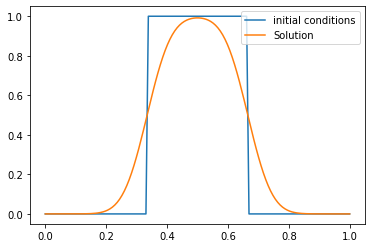

In [16]:
func = g
plt.figure()
plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "initial conditions")
plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
plt.legend()

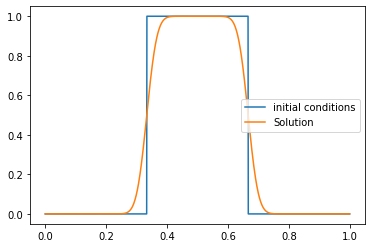

In [19]:
C = 1
u = 1.0
nx = 1280

g = upwind_advection(nx, u, C, init_cond=tophat)

func = g
plt.figure()
plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "initial conditions")
plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
plt.legend()

Text(0.5, 0.98, 'First-order upwind method for linear advection with the top hat initial conditions')

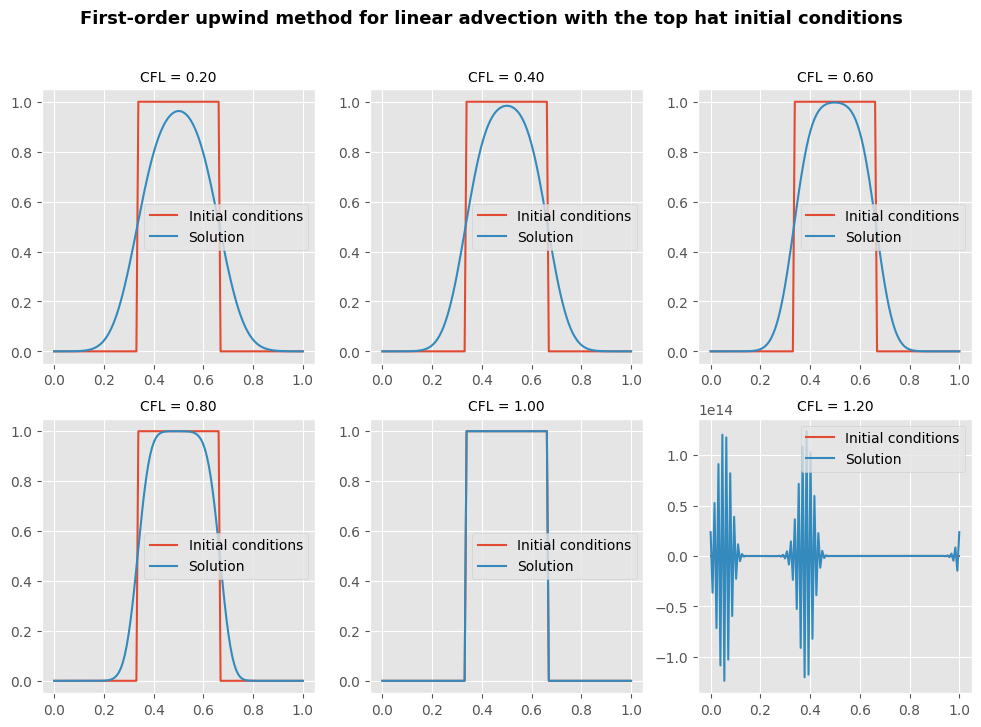

In [57]:
C = 0.2
u = 1.0
nx = 128

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=100)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = upwind_advection(nx, u, C, init_cond=tophat)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("CFL = "+ "{:.2f}".format(C), fontsize="10")
        count +=1
        C = C + 0.2


fig.suptitle("First-order upwind method for linear advection with the top hat initial conditions for diff. CFL", fontweight="bold", fontsize="13")

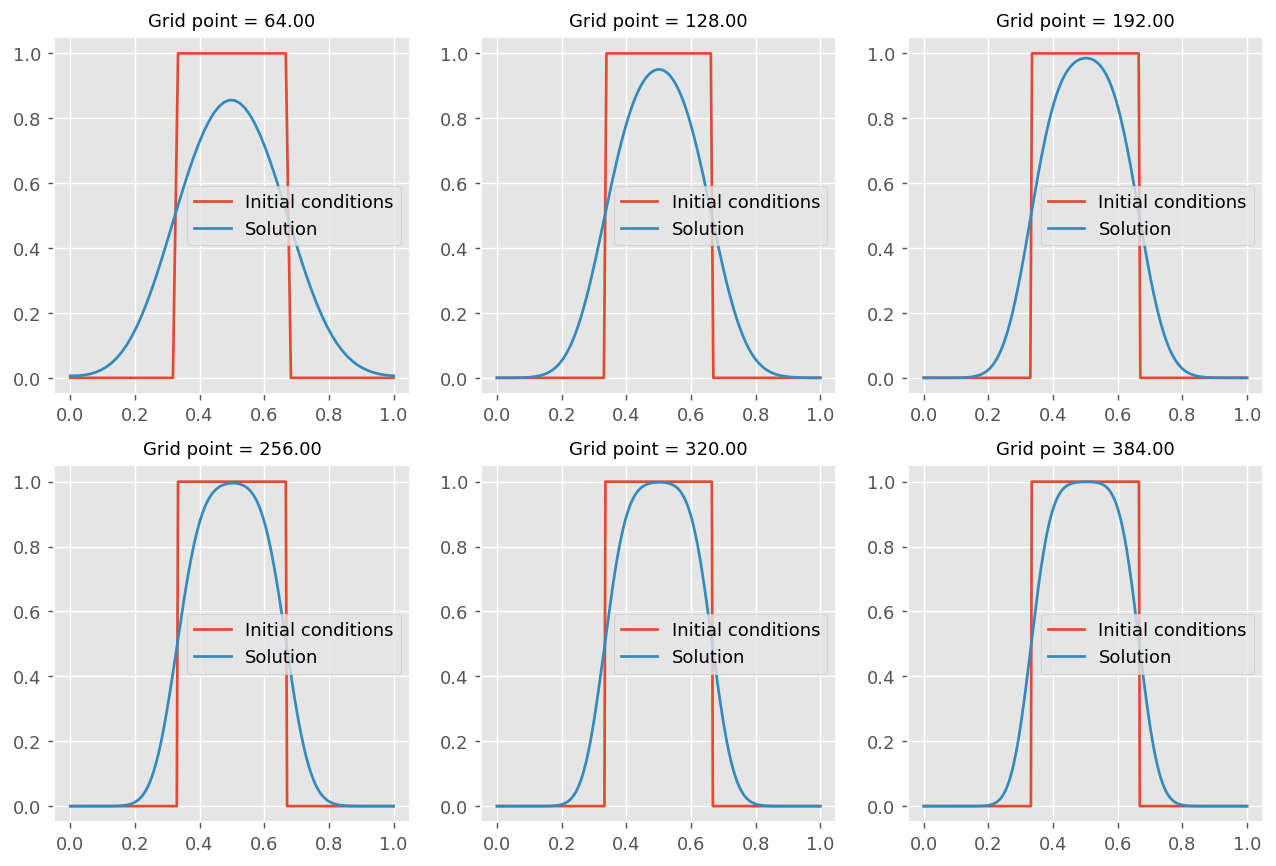

In [75]:
C = 0.1
u = 1.0
nx = 64

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=130)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = upwind_advection(nx, u, C, init_cond=tophat)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("Grid point = "+ "{:.2f}".format(nx), fontsize="10")
        count +=1
        nx = nx +64


# fig.suptitle("First-order upwind method for linear advection with the top hat initial conditions for different number of grid point", fontweight="bold", fontsize="12")

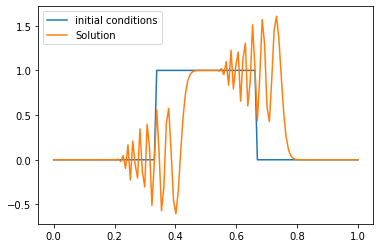

In [71]:
# nx = 256
nx = 128
u = 1.0
C = 0.2

g = ftcs_advection(nx, u, C, init_cond=tophat, num_periods=0.1)
func = g
plt.figure()
plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "initial conditions")
plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
plt.legend()

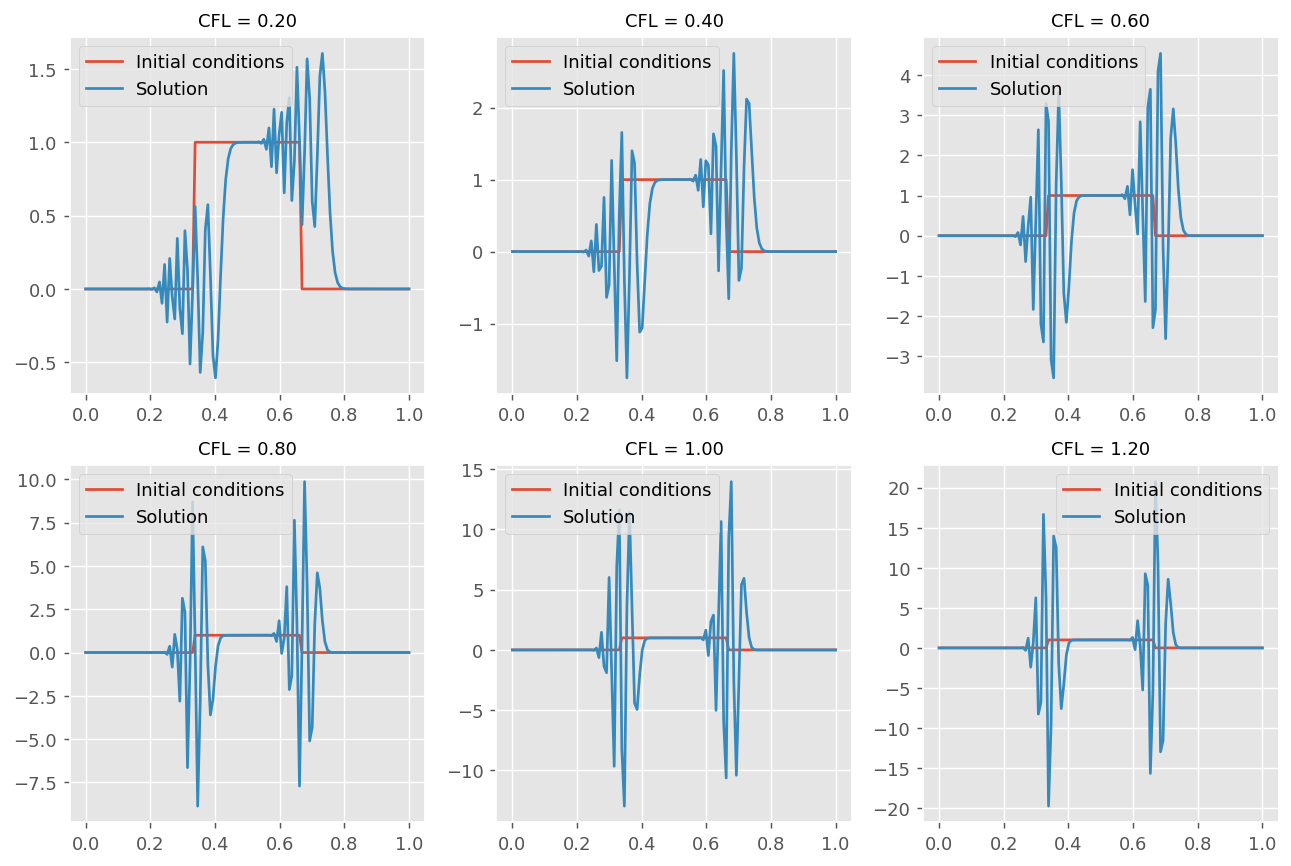

In [72]:
C = 0.2
u = 1.0
nx = 128

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=130)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = ftcs_advection(nx, u, C, init_cond=tophat, num_periods=0.1)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("CFL = "+ "{:.2f}".format(C), fontsize="10")
        count +=1
        C = C + 0.2


# fig.suptitle("First-order FTCS method for linear advection with the top hat initial conditions for diff. CFL", fontweight="bold", fontsize="13")

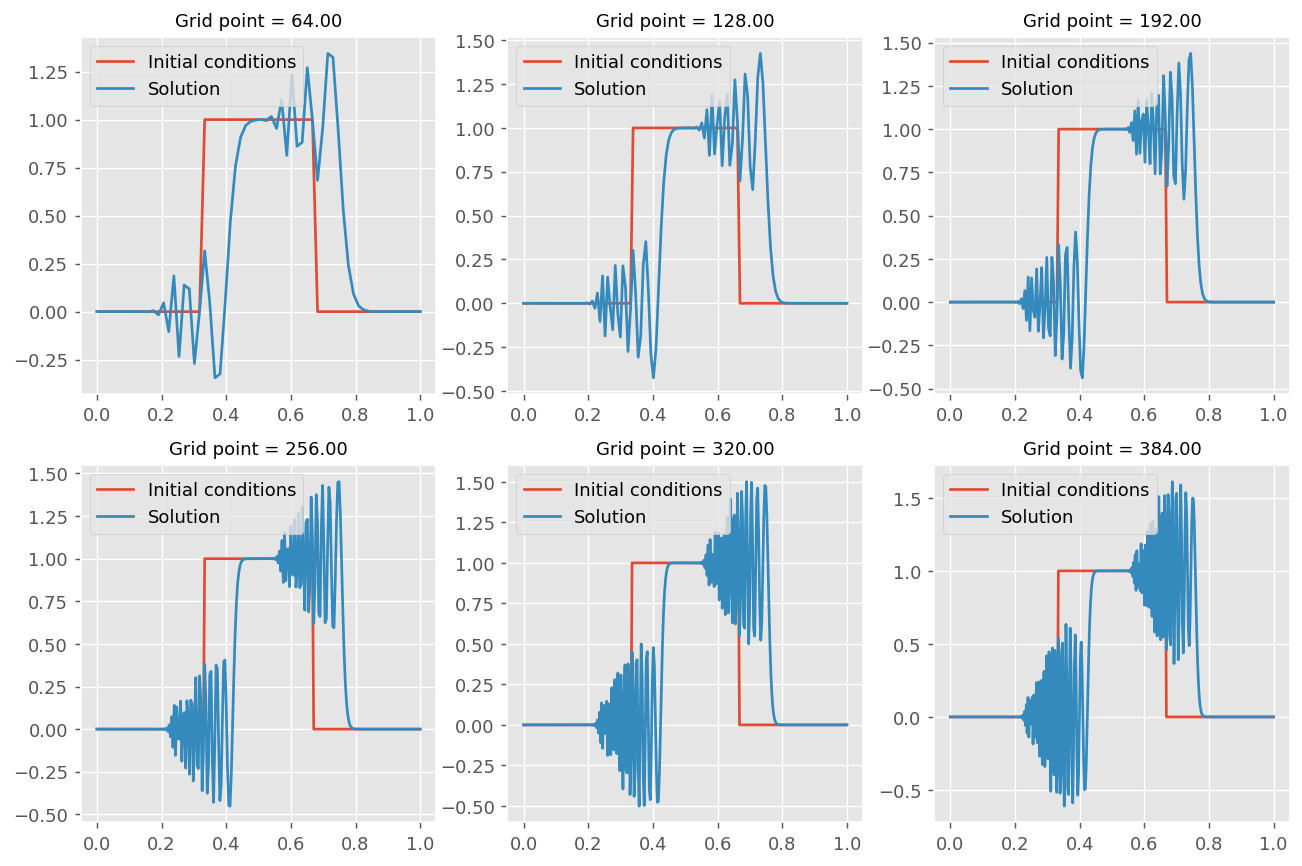

In [74]:
C = 0.1
u = 1.0
nx = 64

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=130)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = ftcs_advection(nx, u, C, init_cond=tophat, num_periods=0.1)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("Grid point = "+ "{:.2f}".format(nx), fontsize="10")
        count +=1
        nx = nx +64


# fig.suptitle("First-order upwind method for linear advection with the top hat initial conditions for different number of grid point", fontweight="bold", fontsize="12")

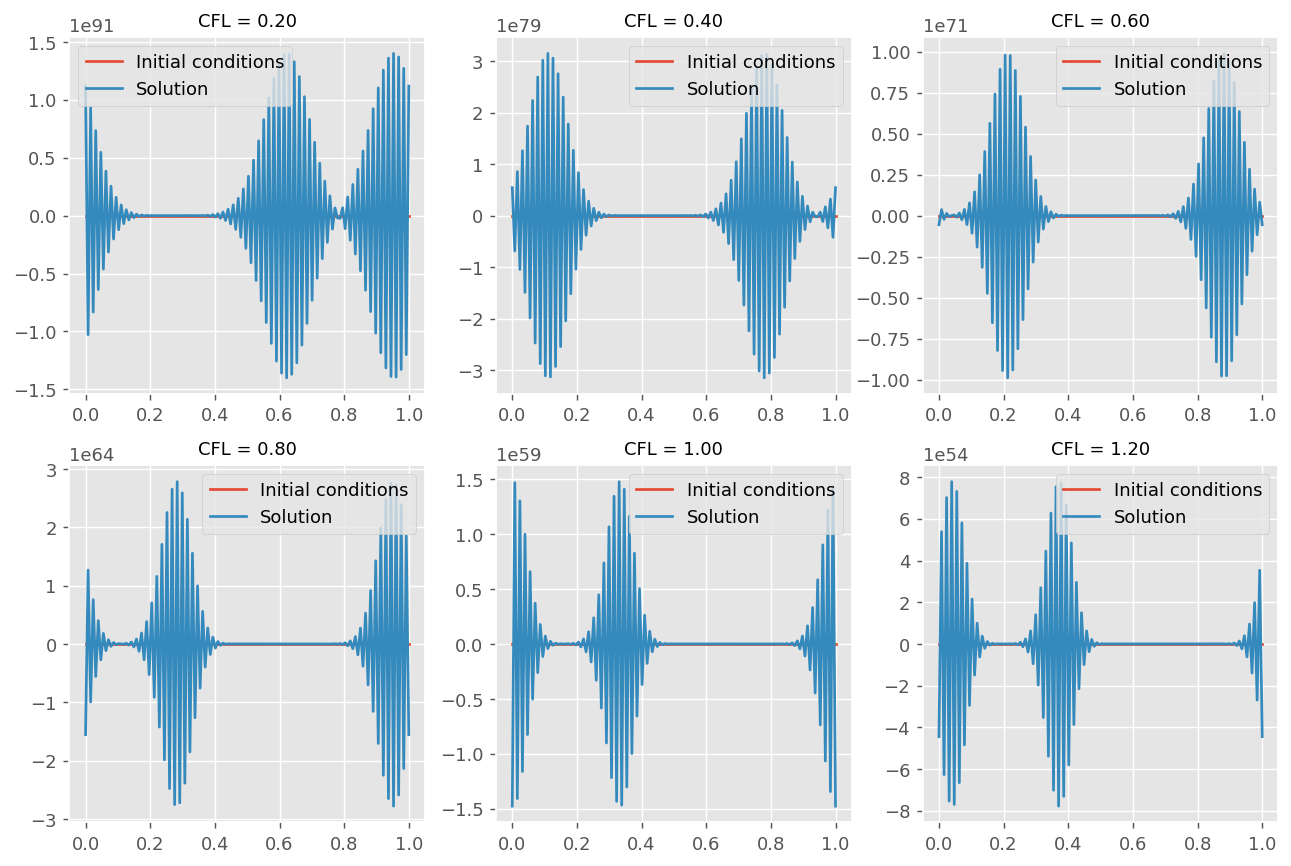

In [78]:
C = 0.2
u = 1.0
nx = 128

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=130)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = downwind_advection(nx, u, C, init_cond=tophat)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("CFL = "+ "{:.2f}".format(C), fontsize="10")
        count +=1
        C = C + 0.2


# fig.suptitle("First-order downwind method for linear advection with the top hat initial conditions for diff. CFL", fontweight="bold", fontsize="13")

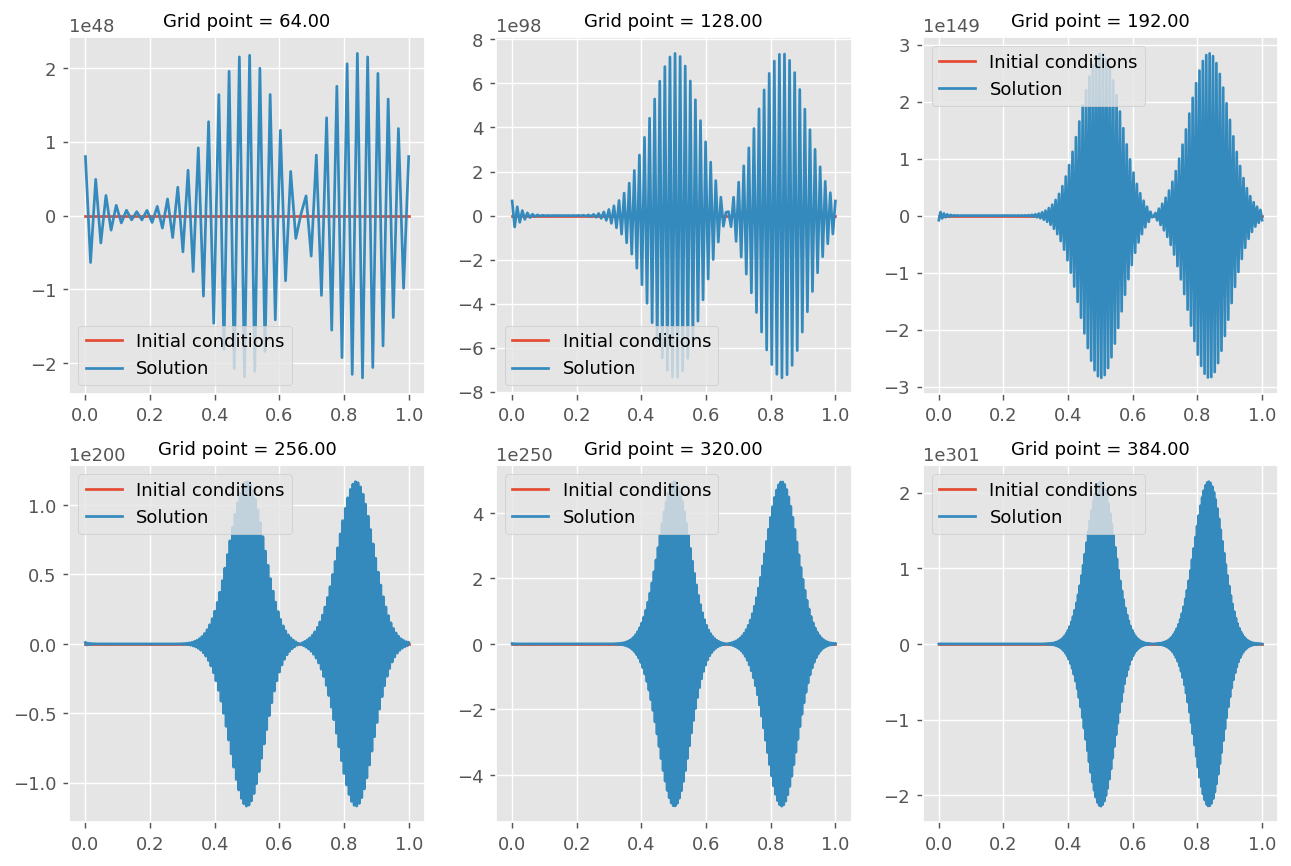

In [79]:
C = 0.1
u = 1.0
nx = 64

nrow, ncol, count = 2,3,1
fig = plt.figure(figsize=(12,8), dpi=130)

with plt.style.context('ggplot'):
    for inv in range(6):
        g = downwind_advection(nx, u, C, init_cond=tophat)
        func = g
        plt.subplot(nrow, ncol, count)
        plt.plot(func.x[func.ilo:func.ihi+1], func.ainit[func.ilo: func.ihi+1], label = "Initial conditions")
        plt.plot(func.x[func.ilo:func.ihi+1], func.a[func.ilo: func.ihi+1], label = "Solution")
        plt.legend()
        plt.title("Grid point = "+ "{:.2f}".format(nx), fontsize="10")
        count +=1
        nx = nx +64


# fig.suptitle("First-order downwind method for linear advection with the top hat initial conditions for different number of grid point", fontweight="bold", fontsize="12")